<div style="color:Blue;background-color:yellow;padding:0.5%;border-radius:150px 150px;font-size:3rem;text-align:center">Predict the Amount in TaxiFare</div>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv("datasets/TaxiFare.csv")
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


## **Meta Data** ##

In [75]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [77]:
df.shape

(50000, 8)

In [78]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [79]:
df = df.drop(['unique_id', 'date_time_of_pickup'], axis = 1)
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [80]:
df.shape

(50000, 6)

In [81]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [82]:
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [83]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


# **Data Visualization** #

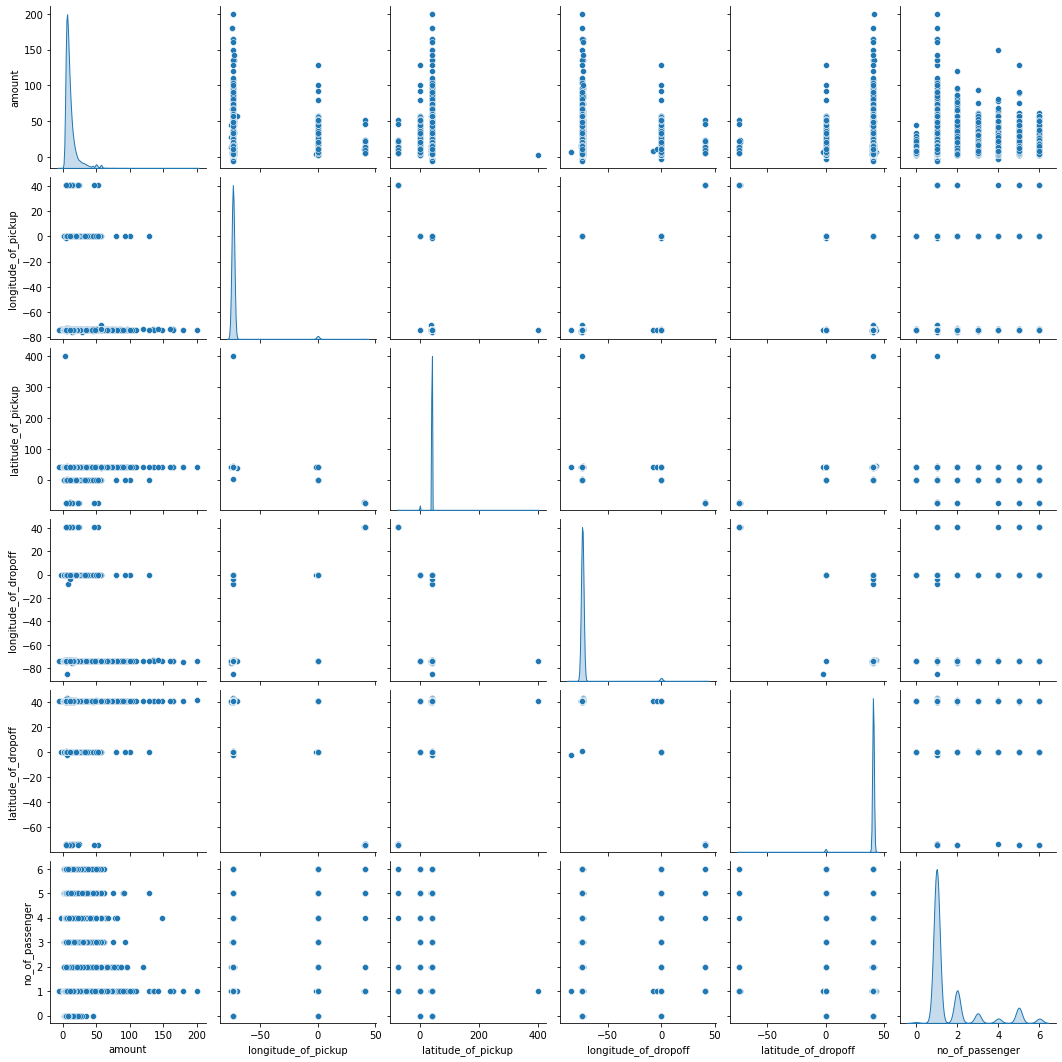

In [84]:
sns.pairplot(df,diag_kind="kde")

# **Train Test Splitting** #

In [85]:
X = df.drop(['amount'], axis = 1)
y = df["amount"]

In [86]:
print(f'shape of X is: {X.shape}')
print(f'shape of y is: {y.shape}')

shape of X is: (50000, 5)
shape of y is: (50000,)


In [87]:
X

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,-73.844311,40.721319,-73.841610,40.712278,1
1,-74.016048,40.711303,-73.979268,40.782004,1
2,-73.982738,40.761270,-73.991242,40.750562,2
3,-73.987130,40.733143,-73.991567,40.758092,1
4,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...
49995,-73.999973,40.748531,-74.016899,40.705993,1
49996,-73.984756,40.768211,-73.987366,40.760597,1
49997,-74.002698,40.739428,-73.998108,40.759483,1
49998,-73.946062,40.777567,-73.953450,40.779687,2


In [88]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Finding The Best Model

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def find_best(X,y):
    algos = {
        'Linear_regression':{
            'model': LinearRegression(),
            'params':{
                'normalize': [True, False]
            }
        },
        'Lasso':{
            'model': Lasso(),
            'params':{
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_scores': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best-score', 'best_params'])


find_best(X, y)

,model,best-score,best_params
0,Linear_regression,NaN,{'normalize': True}
1,Lasso,NaN,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,NaN,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


# **Model Training:** Linear Regression #

In [90]:
lir = LinearRegression(normalize=True)

In [91]:
lir.fit(X_train, y_train)

LinearRegression(normalize=True)

In [92]:
y_pred_lir = lir.predict(X_test)

In [93]:
rsr = lir.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_lir)

In [94]:
print(f'R2 error is: {rsr}')
print(f'Mean Squared Error is: {mse}')

R2 error is: 2.6307848224882413e-05
Mean Squared Error is: 88.00384866927624


In [107]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

print(poly_clf.score(X_train2, y_train))
print(poly_clf.score(X_test2, y_test))

0.003234627011743152
0.000814289176951366


In [96]:
print(poly_clf.score(X_test2, y_test))

0.000814289176951366


# **Model Training:** Lasso Regression #

In [97]:
lso = linear_model.Lasso(alpha=1, selection='random')
lso.fit(X_train, y_train)

Lasso(alpha=1, selection='random')

In [98]:
y_pred_lso = lso.predict(X_test)
rsr_lso = lso.score(X_test, y_test)
mse_lso = mean_squared_error(y_test, y_pred_lso)

print(f'R2 score is: {rsr_lso}')
print(f'Mean Squared Error is: {mse_lso}')

R2 score is: -0.00028612293171614844
Mean Squared Error is: 88.03134450371003


In [106]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.Lasso()

poly_clf.fit(X_train2, y_train)

print(poly_clf.score(X_train2, y_train))
print(poly_clf.score(X_test2, y_test))

0.0005400875940453354
3.318282015085661e-05


# **Model Training:** DecisionTree Regression #

In [100]:
dtr = DecisionTreeRegressor(criterion='mse', splitter='best')
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse')

In [101]:
y_pred_dtr = dtr.predict(X_test)
rsr_dtr = dtr.score(X_test, y_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)

print(f'R2 score is: {rsr_lso}')
print(f'Mean Squared Error is: {mse_lso}')

R2 score is: -0.00028612293171614844
Mean Squared Error is: 88.03134450371003


In [105]:
from sklearn import tree

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = tree.DecisionTreeRegressor()

poly_clf.fit(X_train2, y_train)

print(poly_clf.score(X_train2, y_train))
print(poly_clf.score(X_test2, y_test))

0.9767415182574819
0.46877102813974914
